<a href="https://colab.research.google.com/github/anamueller/Modelagem-Computacional/blob/main/Projeto_2_Sincroniza%C3%A7%C3%A3o_de_Neur%C3%B4nios_Acoplados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto 2 - Sincronização de Neurônios


---


###Ana Clara Mueller Miranda, RA: 148806
###Bruno Pires Moreira Silva, RA: 139892
###Jonatas Carrocine, RA: 143472

---



##1. Introdução

O projeto 2 tem como objetivo estudar a sincronização de neurônios acoplados em rede, utilizando o modelo van der Pol, um oscilador de relaxamento,sendo definido como um laço de realimentação entre uma variável excitatória 'x' e uma variável inibitória 'y'.

As suas equações são:

$$
\dfrac {dx}{dt} = 3x - x^3 + 2 - y + I + ρ
$$

$$
\dfrac {dy}{dt} = ε (α(1+tanh(x/β)) - y )
$$

Nas equações acima, I representa o estímulo externo, ρ é o valor de ruído, ε é um valor positivo pequeno e α e β são parâmetros da equação.

Por fim, temos a equação para descrever o acoplamento entre os neurônios, dado por: 

$$
Sᵢ = \sum\limits_{k∈N(i)}^{}wᵢₖH(xₖ - θ)
$$

Na equação, temos que wᵢₖ representa a força do acoplamento, N(i) define a vizinhança do neurônio i e H() é uma função que define que caso x seja maior que o theta (o limiar de corte), retorna 1, caso contrário retorna 0.

Além disso, foi colocado como critério mínimo no projeto:
 1. 500 neurônios na simulação;
 2. Grau de vizinhança entre os neurônios com valor 2;
 3. Uma rede regular cirular quando a rede de neurônios forem acoplados.

##2. Implementação do projeto

Bibliotecas inicialmente utilizadas:

In [ ]:
import numpy as np #Utilizado para as equações
import random #Utilizado para gerar valores aleatórios em 'x' e 'y' na hora de criar um neurônio
import math #Utilizado para fazer o método 'tanh()'

Declarando os parâmetros iniciais, especificado no projeto, e gerando vetores para armazenas os valores de Dx, Dy e o acoplamento.

In [ ]:
I = 0.2 # i Ativo
In = -0.02 # i inativo
N = 500 #Quantidade de neurônios
w_ij = 0.1 #Acoplamento
 
Θ = 0.5 #Theta
α = 6.0 #Alpha
ε = 0.02 #Epsilon
β = 0.1 #Beta
ρ = 0.01 #Rho
 

###2.1 Criação de neurônios randômicos

Aqui será gerado os neurônios, com as suas posições em 'x' e 'y'

In [ ]:
def cria_neuronio_y(N):
  return random.uniform(0, 4)
def cria_neuronio_x(N):
  return random.uniform(0, 4)-2
x = []
y = []
xa = []
ya = []
xw = []
yw = []
for i in range (N):
  aux = cria_neuronio_x(N)
  aux2 = cria_neuronio_y(N)
  x.append([aux,[aux]])
  y.append([aux2,[aux2]])
  xa.append([aux,[aux]])
  ya.append([aux2,[aux2]])
  xw.append([aux,[aux]])
  yw.append([aux2,[aux2]])


###2.2 Cálculo da EDOs


Aqui é desenvolvido o acoplamento e as fórmulas de van der Pool

In [ ]:
def Sk(x_k):
  if (( x_k - Θ ) >= 0):
    return  w_ij
  else:
    return 0 
 
def edo(x,y,antx, proxx):
  #print(x)
  dxi = (3*x-x**3 + 2 -y+ I+ ρ)*0.01 #+ (Sk(antx)+Sk(proxx))*0.01
  dyi = ε *(α *(1+ math.tanh(x/β))-y)*0.01
  #print(dxi+x)
  
  return [dxi, dyi]

def edo_acop(x,y,antx, proxx):
  #print(x)
  dxi = (3*x-x**3 + 2 -y+ I+ ρ + Sk(antx)+Sk(proxx))*0.01
  dyi = ε *(α *(1+ math.tanh(x/β))-y)*0.01
  #print(dxi+x)
  
  return [dxi, dyi]

###2.3 Simulações

####2.3.1 Simulação sem acoplamento

Nessa seção, os resultados obtidos irão ser colocados nas listas dos eixos 'x' e 'y', para cada neurônio.

In [ ]:
#neuronios = cria_neuronio(N)
for i in range(500000):
  for j in range(N):
    result = edo( x[j][0], 
                 y[j][0], 
                 x[j-1][0],
                 x[(j+1)%N][0]
                 )
    
    if(i%5==0):
      x[j][1].append(result[0] + x[j][0])
      y[j][1].append(result[1]+ y[j][0])

      x[j][0] = result[0] + x[j][0]
      y[j][0] = result[1] + y[j][0]       


####2.3.2 Simulação com acoplamento

In [ ]:
#neuronios = cria_neuronio(N)
for i in range(500000):
  for j in range(N):
   # print(j)
    result = edo_acop( xa[j][0], 
                 ya[j][0], 
                 xa[j-1][0],
                 xa[(j+1)%N][0]
                 )

    if(i%5==0):
      xa[j][1].append(result[0] + xa[j][0])
      ya[j][1].append(result[1]+ ya[j][0])

      xa[j][0] = result[0] + xa[j][0]
      ya[j][0] = result[1] + ya[j][0]

In [ ]:
w_ij = 0.5 #Aumentado

In [ ]:
#neuronios = cria_neuronio(N)
for i in range(500000):
  for j in range(N):
   # print(j)
    result = edo_acop( xw[j][0], 
                 yw[j][0], 
                 xw[j-1][0],
                 xw[(j+1)%N][0]
                 )

    if(i%5==0):
      xw[j][1].append(result[0] + xw[j][0])
      yw[j][1].append(result[1]+ yw[j][0])

      xw[j][0] = result[0] + xw[j][0]
      yw[j][0] = result[1] + yw[j][0]

###2.4 Gerando os gráficos

####Simulação com todos os neurônios ativos

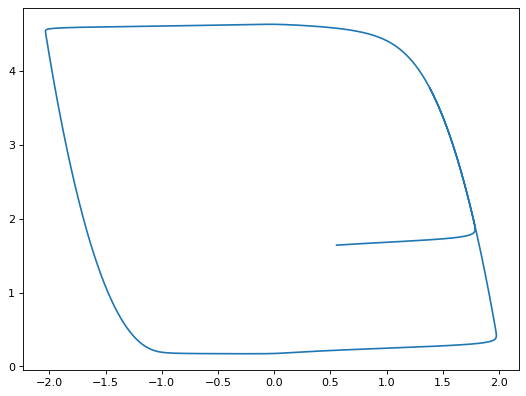

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

plt.plot(x[0][1],y[0][1])
plt.show()

####2.4.1 Plot sem acoplamento

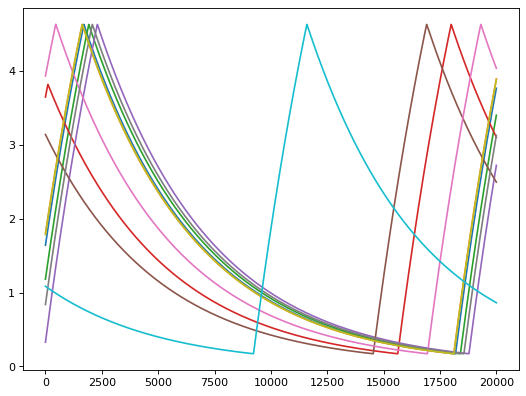

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

for i in range (0,N,50):
  plt.plot(range(0,20001),y[i][1])
plt.show()

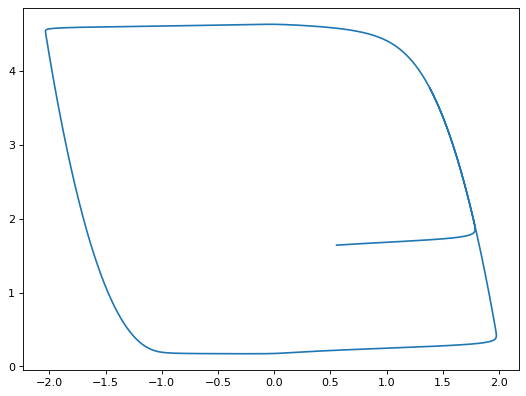

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

#for i in range (N):
plt.plot(x[0][1],y[0][1])
plt.show()

####2.4.2 Plot com acoplamento

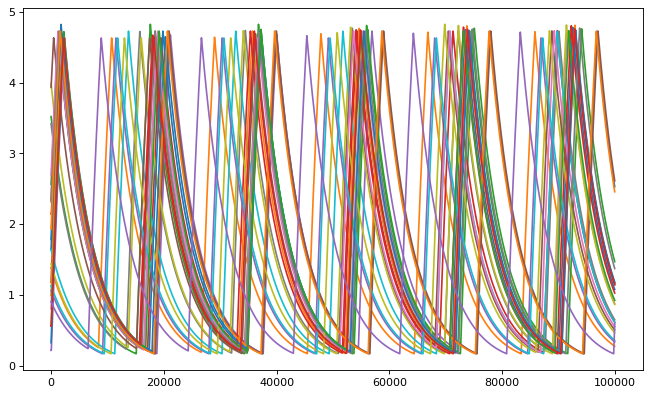

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=80)

for i in range (0,N,20):
  plt.plot(range(0,100001),ya[i][1])
plt.show()

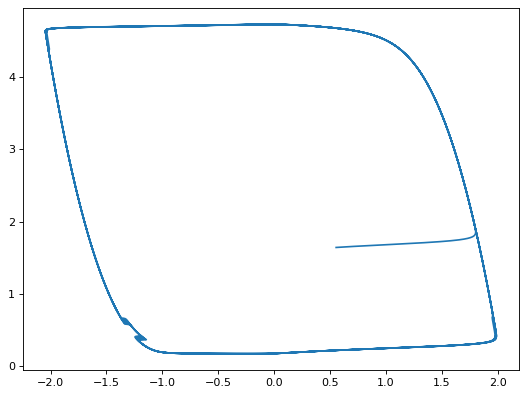

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

#for i in range (N):
plt.plot(xa[0][1],ya[0][1])
plt.show()

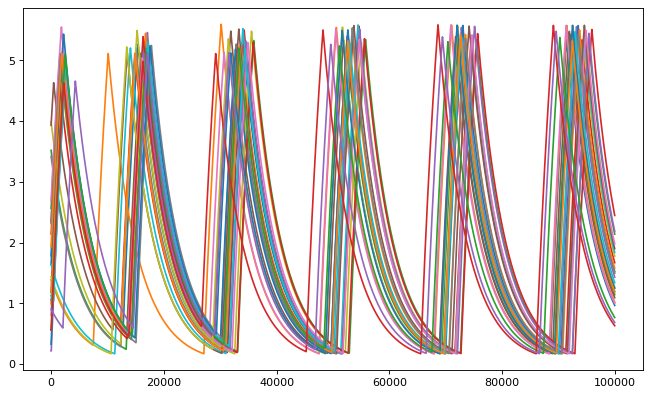

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=80)

for i in range (0,N,20):
  plt.plot(range(0,100001),yw[i][1])
plt.show()

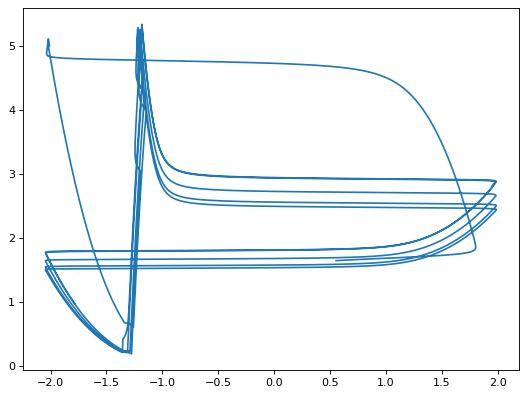

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

#for i in range (N):
plt.plot(xa[0][1],yw[0][1])
plt.show()

##3. Conclusão

Através da simulação e da geração dos gráficos obtidos, podemos observar que: neurônios com acomplamentos eventualmente irão convergir e sincronizarem após um grande intervalo de tempo. A força de acoplamento faz diferença pois como vemos pelo gráfico quanto maior a força, o intervalo de tempo necessário para ser haver mudanças no estado do neurônio é menor.
